# Импорт библиотек 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_score
from sklearn.decomposition import PCA 

# Чтение данных

In [ ]:
first_df=pd.read_csv("/content/Second_week_first_dataset.csv", index_col=0)
second_df=pd.read_csv("/content/Second_week_second_dataset.csv", index_col=0)
third_df=pd.read_csv("/content/Second_week_third_dataset.csv", index_col=0)

# Кластеризация 2 и 3 датасетов

In [ ]:
first_df.head()

,X,Y
0,0.428854,0.003982
1,-0.020893,-0.294434
2,-0.797804,-0.700211
3,0.207282,0.252464
4,-0.259663,0.321410


In [ ]:
second_df.head()

,X,Y
0,5.432943,0.109422
1,-9.101988,7.139412
2,1.402974,0.376474
3,5.578543,0.229852
4,1.392159,8.419821


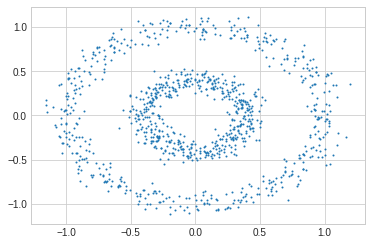

In [ ]:
plt.scatter(first_df.X, first_df.Y, [1])

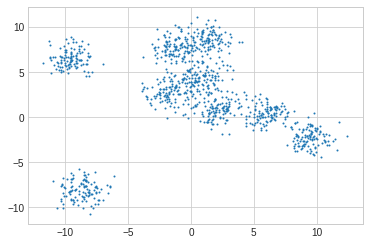

In [ ]:
plt.scatter(second_df.X, second_df.Y, [1])

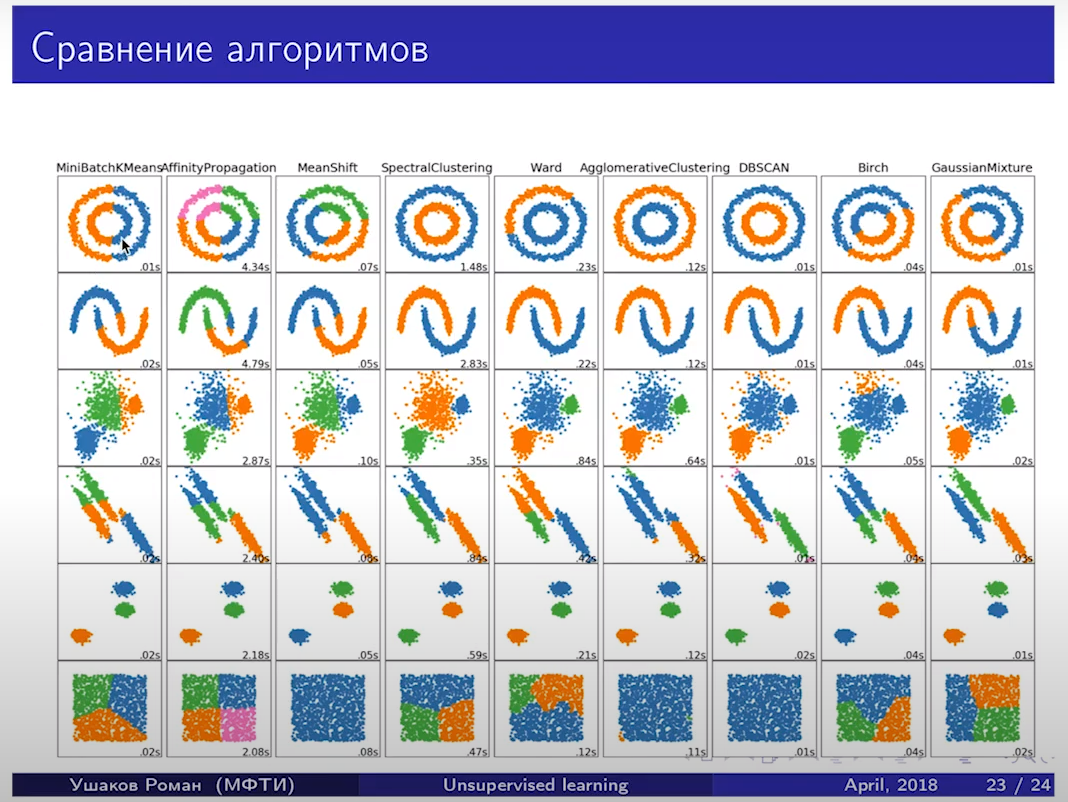

Для второго датасета подойдет агломеративная кластеризация, для первого - DBSCAN

---



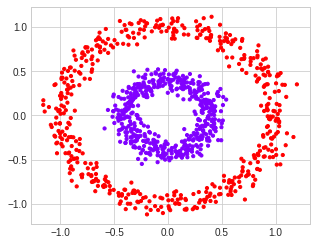

In [ ]:
first_dfs=StandardScaler().fit_transform(first_df)
db=DBSCAN(eps=0.3, min_samples=2).fit(first_dfs)
labels=db.labels_
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5, 4))
plt.scatter(first_df["X"], first_df["Y"], c=labels, cmap='rainbow', s=10)
plt.show()


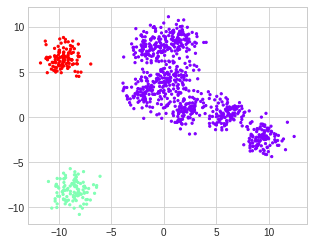

In [ ]:
clt = AgglomerativeClustering(n_clusters=3, linkage='single')
model=clt.fit(second_df)
pred=model.fit_predict(second_df)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5, 4))
plt.scatter(second_df["X"], second_df["Y"], c=pred, cmap='rainbow', s=5)
plt.show()

# Кластеризация 3 датасета

In [ ]:
third_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,NaN
2,4.9,3.0,1.4,0.2,0.0
3,4.7,3.2,1.3,0.2,0.0
4,4.6,3.1,1.5,0.2,NaN
5,5.0,3.6,1.4,0.2,NaN


Найдем индексы строк с пропущенными значениями вида цветка. 

In [ ]:
empty_species_ind=[i for i in range (0, third_df.shape[0]) if third_df.Species.iloc[i] not in [0,1]]

In [ ]:
species=third_df.Species
third_df.drop(['Species'], axis=1, inplace=True)

Перед кластеризацией нужно понизить размерность данных 

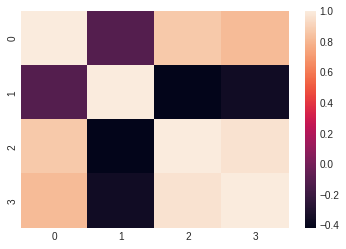

In [ ]:
third_df=pd.DataFrame(StandardScaler().fit_transform(third_df))
sns.heatmap(third_df.corr())

Большая часть признаков имеет высокую корреляцию с другими, значит мы без больших потерь информации можем понизить размерность данных

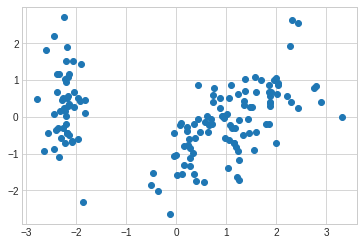

In [ ]:
pca = PCA(n_components = 2)
pca.fit(third_df)
data_pca = pca.transform(third_df)
data_pca = pd.DataFrame(data_pca,columns=['feature_1','feature_2'])
plt.scatter(data_pca["feature_1"], data_pca["feature_2"])
plt.show()

Для кластеризации такого распределения данных подойдет агломеративный метод

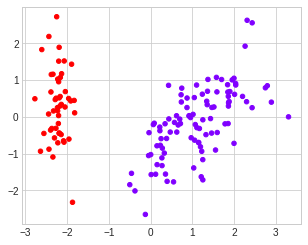

In [ ]:
clt = AgglomerativeClustering(n_clusters=2)
model=clt.fit(data_pca)
pred=model.fit_predict(data_pca)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5, 4))
plt.scatter(data_pca["feature_1"], data_pca["feature_2"], c=pred, cmap='rainbow', s=20)
plt.show()

Удалим из предсказаний цветы, виды которых мы не знаем по изначальным данным. Также удалим пропущенные значения в массиве с верными видами цветов 

In [ ]:
species=species.to_numpy()
species_without_nuns=np.delete(species, empty_species_ind)
pred_without_nuns=np.delete(pred, empty_species_ind)
print(species_without_nuns, "\n", pred_without_nuns)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


Рассчитаем метрику гомогенности

In [ ]:
hs=homogeneity_score(species_without_nuns, pred_without_nuns)
hs

1.0

Все ирисы находятся в верных кластерах